Notebook em **R** que mostra procedimentos para a obtenção de um **Gráfico de Linha** e de um **Gráfico de Barras** a partir de um exemplo do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)**

<!-- TEASER_END -->

# Exemplos do livro Six Sigma: A Complete Step-by-Step Guide

![Six Sigma: A Complete Step-by-Step Guide](https://raw.githubusercontent.com/vstram/SixSigmaInR/master/book_cover-small.jpg)

## Conteúdo:
* [Exercício](#Exercício)
* [Procedimento](#Procedimento)
* [Solução Alternativa](#Solução-Alternativa)
* [Referências](#Referências)

## Exercício

O exercício (pág 201) pede para calcular a taxa de retornos a cada 100 vendas ao longo de 12 meses. A tabela com o número de retornos e o número de vendas para esse período é fornecida.

## Procedimento

In [ ]:
# Importa a biblioteca para plotar os gráficos
library(ggplot2)
library(tidyverse, quietly=TRUE)
options(repr.plot.width=16, repr.plot.height=8) # define um tamanho padrão para o gráfico

1. Carregar os dados a partir do arquivo CSV

In [2]:
#read data and add rate
data <- read.csv("ch13p201.txt", header=TRUE)
data

Month,NumberOfReturns,NumberOfSales
<chr>,<int>,<int>
January,105,3500
Febrary,95,2200
March,125,2500
April,140,2800
May,215,3000
June,200,2900
Jule,190,2700
August,245,3300
September,225,3100


2. Calcular a taxa de retornos

A taxa de retorno é definida como $ReturnsRate = \frac{NumberOfReturns}{NumberOfSales} \times 100$

In [3]:
data$ReturnsRate <- data$NumberOfReturns / data$NumberOfSales * 100
data

Month,NumberOfReturns,NumberOfSales,ReturnsRate
<chr>,<int>,<int>,<dbl>
January,105,3500,3.000000
Febrary,95,2200,4.318182
March,125,2500,5.000000
April,140,2800,5.000000
May,215,3000,7.166667
June,200,2900,6.896552
Jule,190,2700,7.037037
August,245,3300,7.424242
September,225,3100,7.258065


3. Plotar o gráfico

A biblioteca `ggplot` possui um arsenal de possibilidades de configuração do gráfico bastante grande e poderoso. Pode-se usar este poderio para 'passar a mensagem' em seus gráficos.

In [4]:
# Calcula a mediana dos dados de ReturnsRate
med <- median(data$ReturnsRate)

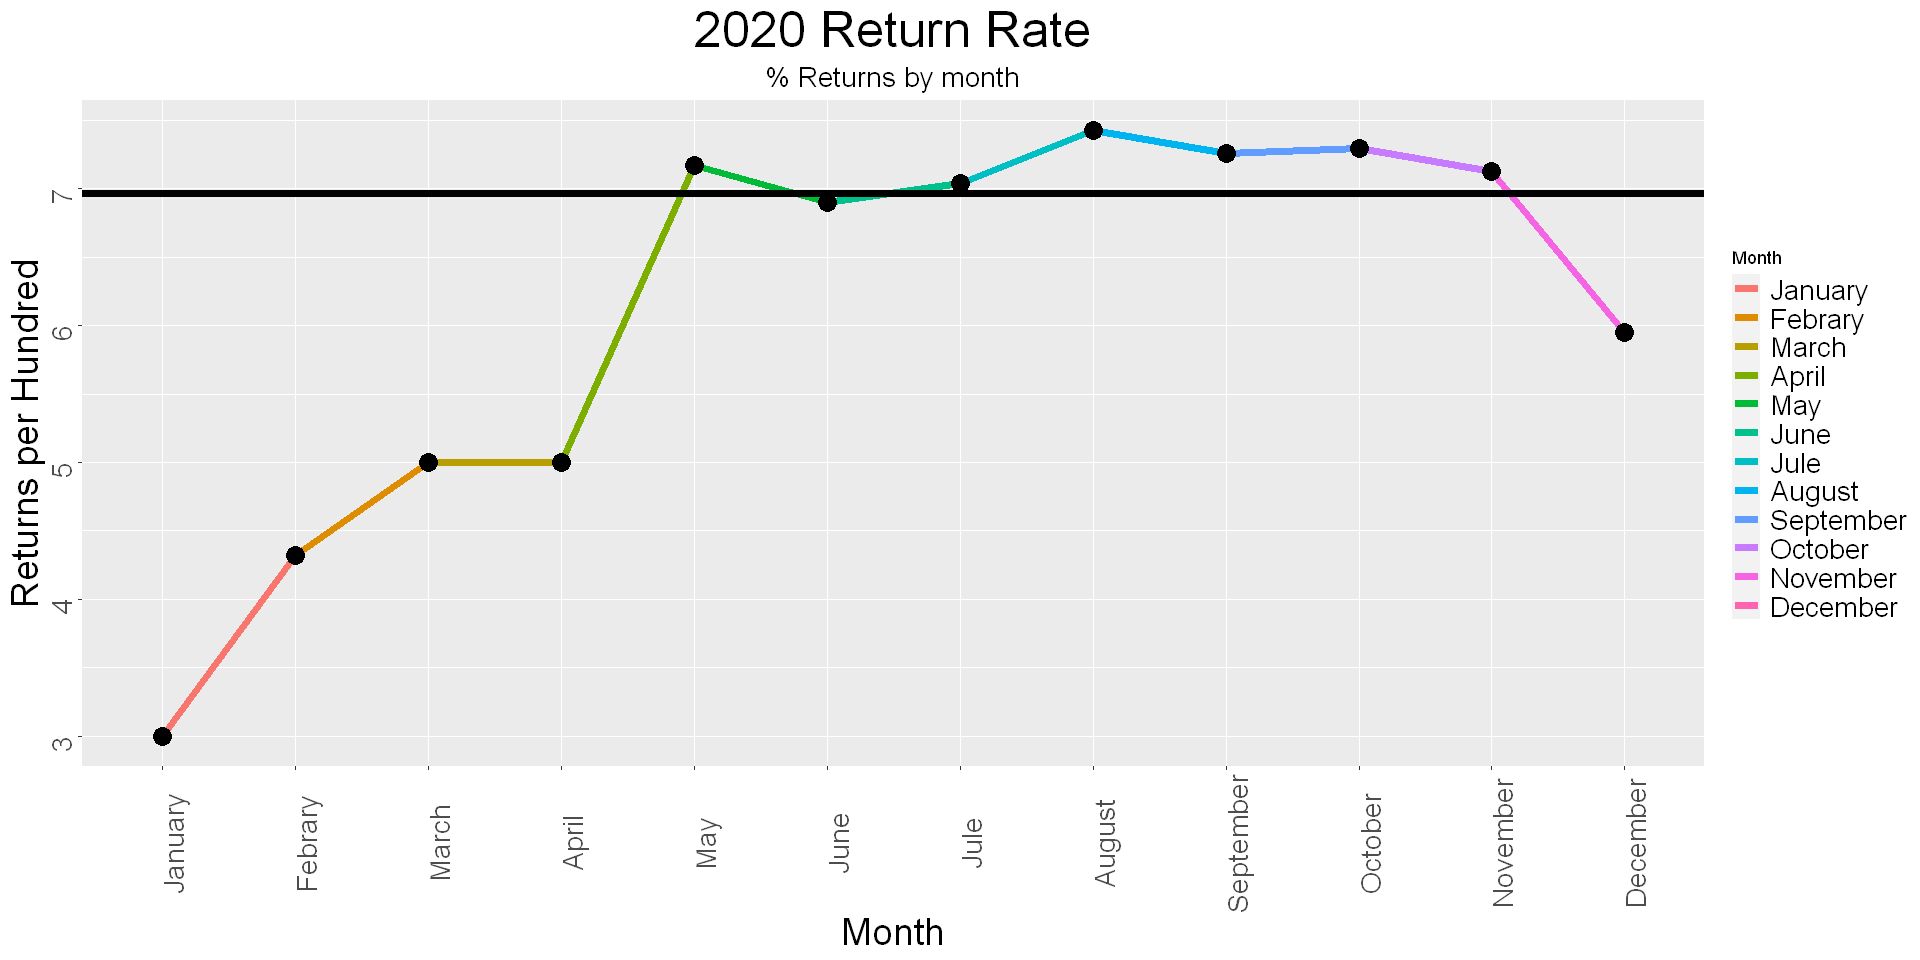

In [5]:
# Criar um factor para o eixo x, forçamos o R a manter a ordem dos meses
# correta. Usar data$Month diretamente faria com que o eixo x fosse ordenado
# em ordem alfabetica, o que não é o que desejamos aqui
data$Month = factor(data$Month, level = data$Month, labels = data$Month)
ggplot(
    data, 
    aes(
        x=Month, 
        y=ReturnsRate, group=1)
) + 
labs(
    title="2020 Return Rate",
    subtitle = "% Returns by month",
    x="Month", 
    y = "Returns per Hundred"
) +
geom_line(aes(color=Month), size=2) + # colore a linha usando os meses, define espessura
geom_point(size=5) + # define o tamanho do simbolo
geom_hline(yintercept = med, size=2) + # define a linha horizontal que é a mediana de ReturnsRate
theme(
    plot.title = element_text(size=30, hjust = 0.5), # define tamanho e alinhamento do título
    plot.subtitle = element_text(size=17, hjust = 0.5), # define tamanho e alinhamento do subtítulo
    axis.text = element_text(size=17, angle = 90), # define tamanho e orientação texto do eixo
    axis.title = element_text(size=22),
    legend.text = element_text(size=17) # define tamanho da fonte da legenda
)

## Solução Alternativa

Embora o exemplo solicitasse um gráfico de linha, às vezes para passar a mensagem deve-se pensar em outro tipo de gráfico. Pessoalmente, gosto do grafico de barras. No exemplo abaixo, o gráfico foi configurado para colorir apenas as barras que ultrapassaram a mediana. Esse mesmo método pode ser usado para destacar barras através de um critério mais complexo, caso seja necessário.

In [6]:
# Define critério usado para destacar as barras
data$AboveMedian <- data$ReturnsRate > med
data

Month,NumberOfReturns,NumberOfSales,ReturnsRate,AboveMedian
<fct>,<int>,<int>,<dbl>,<lgl>
January,105,3500,3.000000,FALSE
Febrary,95,2200,4.318182,FALSE
March,125,2500,5.000000,FALSE
April,140,2800,5.000000,FALSE
May,215,3000,7.166667,TRUE
June,200,2900,6.896552,FALSE
Jule,190,2700,7.037037,TRUE
August,245,3300,7.424242,TRUE
September,225,3100,7.258065,TRUE


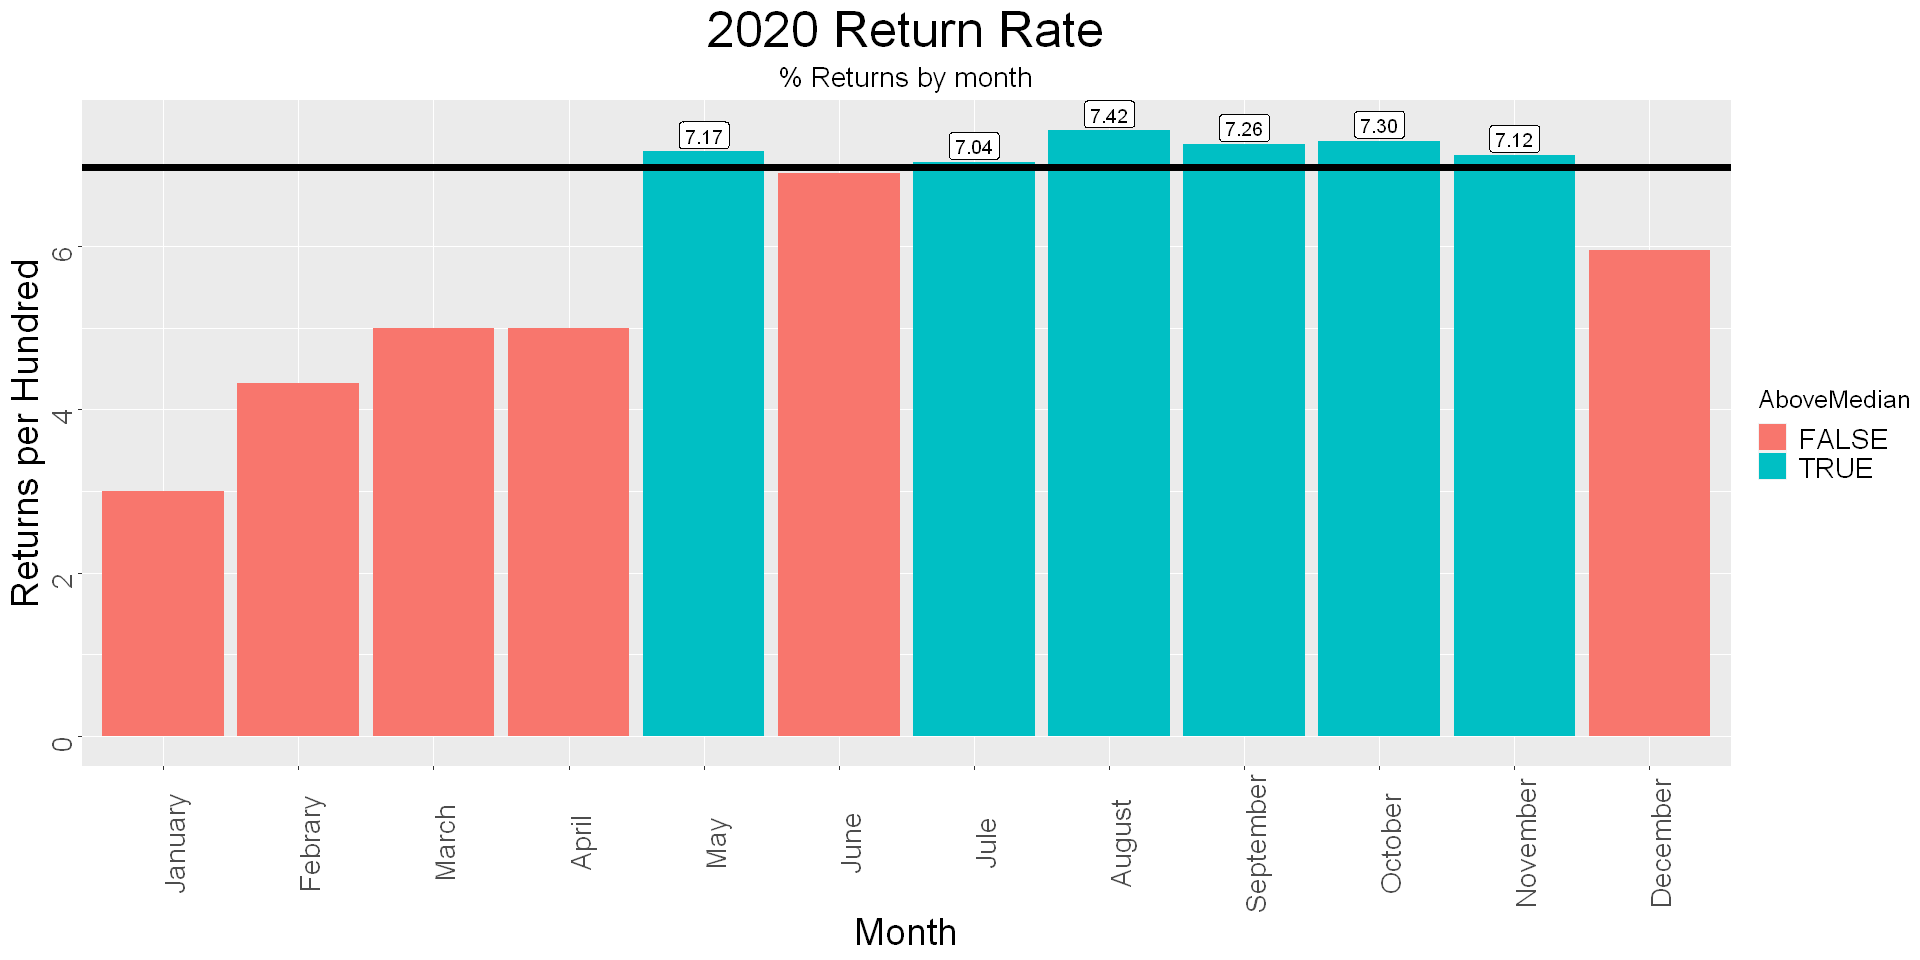

In [7]:
data$Month = factor(data$Month, level = data$Month, labels = data$Month)
ggplot(
    data, 
    aes(
        x=Month, 
        y=ReturnsRate, 
        group=1
    )
) + 
labs( # configura: título, subtítulo e os titulos dos eixos
    title="2020 Return Rate",
    subtitle = "% Returns by month",
    x="Month", 
    y = "Returns per Hundred"
) +
geom_bar(stat="identity", aes(fill=AboveMedian)) +
geom_label( 
    data=data %>% filter(AboveMedian == TRUE), # destaca apenas as barras com ReturnRate > med
    aes(label=sprintf("%0.2f", round(ReturnsRate, digits = 2))), # define label para 2 dígitos
    vjust=-0.1, # ajusta a posição vertical do label
    size=4.0, # define o tamanho do label
) +
geom_hline(yintercept = med, size=2) + # define a linha horizontal que é a mediana de ReturnsRate
theme(
    plot.title = element_text(size=30, hjust = 0.5), # define tamanho e alinhamento do título
    plot.subtitle = element_text(size=17, hjust = 0.5), # define tamanho e alinhamento do subtítulo
    axis.text = element_text(size=17, angle = 90), # define tamanho e orientação texto do eixo
    axis.title = element_text(size=22),
    legend.text = element_text(size=17), # define tamanho da legenda
    legend.title = element_text(size=15), # define tamanho do titulo da legenda
)

## Referências

Este notebook contém exemplos do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)** disponibilizado pelo [The Council for Six Sigma Certification](https://www.sixsigmacouncil.org/six-sigma-training-material/)

Consulte:
* [The R Graph Gallery](https://www.r-graph-gallery.com/index.html)
* [ggplot2](https://ggplot2.tidyverse.org/index.html)
* [ggplot2-essentials](http://www.sthda.com/english/wiki/ggplot2-essentials)